In [ ]:
#Index Mapping 
"""
S_nt
S_wt
S_tn
I_nt
I_wt
I_tn
V_nt
V_wt
V_tn
Q
R
D
"""

'\nS_nt\nS_wt\nS_tn\nI_nt\nI_wt\nI_tn\nV_nt\nV_wt\nV_tn\nQ\n'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi

In [ ]:
def diff_eqs(input, t, parameters):
  beta = parameters[0] 
  gamma = parameters[1]
  chi = parameters[2]
  epsilon = parameters[3]
  theta = parameters[4]
  kappa = parameters[5]
  delta = parameters[6]
  mu = parameters[7]
  tau = parameters[8] #Testing rate
  rho = parameters[9] #Result return rate
  fnr = parameters[10] #False negative rate
  fpr = parameters[11] #False positive rate

  Y = np.zeros((12)) #SIRVQD
  V = input
  N = V[0]+V[1]+V[2]+V[3]+V[4]+V[5]+V[6]+V[7]+V[8]+V[9]+V[10] #Not including dead individuals
  S_effective = V[0]+V[1]+V[2]
  V_effective = V[6]+V[7]+V[8]
  I_active = V[3]+V[4]+V[5]

  Y[0] = -beta*I_active*V[0]/N-chi-tau*V[0]
  Y[1] = -beta*I_active*V[1]/N-chi-rho*V[1]+tau*V[0]
  Y[2] = -beta*I_active*V[2]/N-chi+rho*(1-fpr)*V[1]
  Y[3] = beta*S_effective*I_active/N+epsilon*V_effective*I_active/N-gamma*V[3]-mu*V[3]-tau*V[3]
  Y[4] = -rho*V[4]+tau*V[3]
  Y[5] = rho*fnr*V[4]-gamma*V[5]-mu*V[5]
  Y[6] = -epsilon*I_active*V[6]/N+chi-tau*V[6]
  Y[7] = -epsilon*I_active*V[7]/N+chi-rho*V[7]+tau*V[6]
  Y[8] = -epsilon*I_active*V[8]/N+chi+rho*(1-fpr)*V[7]
  Y[9] = rho*fpr*V[1]+rho*(1-fnr)*V[4]+rho*fpr*V[7]-kappa*V[9]-delta*V[9]
  Y[10] = gamma*(V[3]+V[5])+kappa*V[9]
  Y[11] = mu*(V[3]+V[5])+delta*V[9]
  return Y

In [12]:
starting_infections = 0.001 # 0.1% of the total popultion starts off infected
starting_vaccinations = 0.01
INPUT_0 = np.array([1-starting_infections-starting_vaccinations, 0, 0, starting_infections, 0, 0, starting_vaccinations, 0, 0, 0, 0, 0])*10**6 # Initial values of SIRVQD scaled to a population of one million
R0 = 16
CFR = 0.0653 # Case fatality rate
gamma = 0.0714*(1-CFR)
mu = 0.0714*CFR
beta = R0*(gamma+mu)
chi = 0.7 / 365
epsilon = 0.075*beta
theta = 0.5*0.0714
kappa = gamma
delta = mu
tau = 0.8
rho = 0.33
fnr = 0.05
fpr = 0.01
parameters = np.array([beta, gamma, chi, epsilon, theta, kappa, delta, mu, tau, rho, fnr, fpr])
ND_end = 100 # Number of days to simulate

t_start = 0.0; t_end = ND_end; t_inc = 0.05
t_range_init = np.arange(t_start, t_end+t_inc, t_inc) # Time points to solve the system at
RES_init = spi.odeint(diff_eqs,INPUT_0,t_range_init,args=(parameters,))

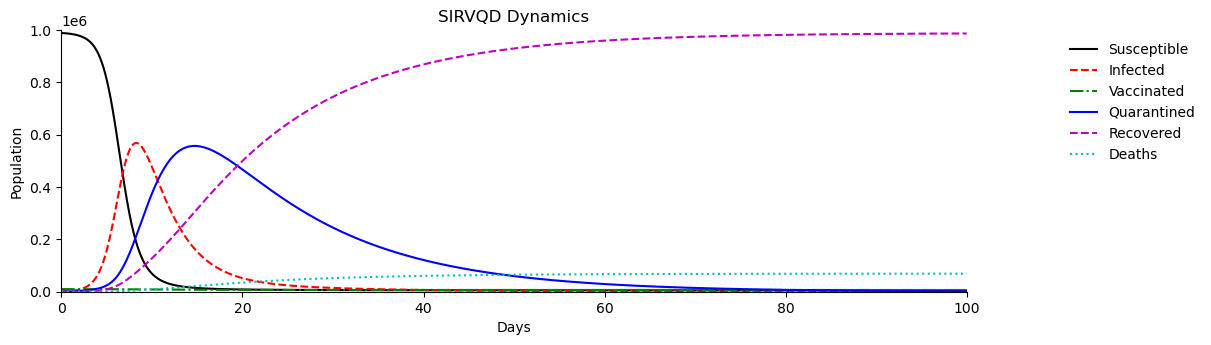

In [13]:
fig = plt.figure(figsize=(10,3.5))
ax = fig.add_subplot(111)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

t_vals = np.arange(0, ND_end + t_inc, t_inc)

S_total = RES_init[:, 0] + RES_init[:, 1] + RES_init[:, 2]  # S_nt + S_wt + S_tn
I_total = RES_init[:, 3] + RES_init[:, 4] + RES_init[:, 5]  # I_nt + I_wt + I_tn
V_total = RES_init[:, 6] + RES_init[:, 7] + RES_init[:, 8]  # V_nt + V_wt + V_tn
Q = RES_init[:, 9]
R = RES_init[:, 10]
D = RES_init[:, 11]

ax.plot(t_vals, S_total, '-k', label='Susceptible') # S
ax.plot(t_vals, I_total, '--r', label='Infected') # I
ax.plot(t_vals, V_total, '-.g', label='Vaccinated') # V
ax.plot(t_vals, Q, '-b', label='Quarantined') # Q
ax.plot(t_vals, R, '--m', label='Recovered') # R
ax.plot(t_vals, D, ':c', label='Deaths') # D

ax.set_xlabel('Days')
ax.set_ylabel('Population')

plt.xlim([0,ND_end])
plt.ylim([0,sum(INPUT_0)])
plt.tight_layout()
plt.title('SIRVQD Dynamics')
plt.legend(bbox_to_anchor = (1.1, 1), loc = 'upper left', frameon=False)
plt.show()